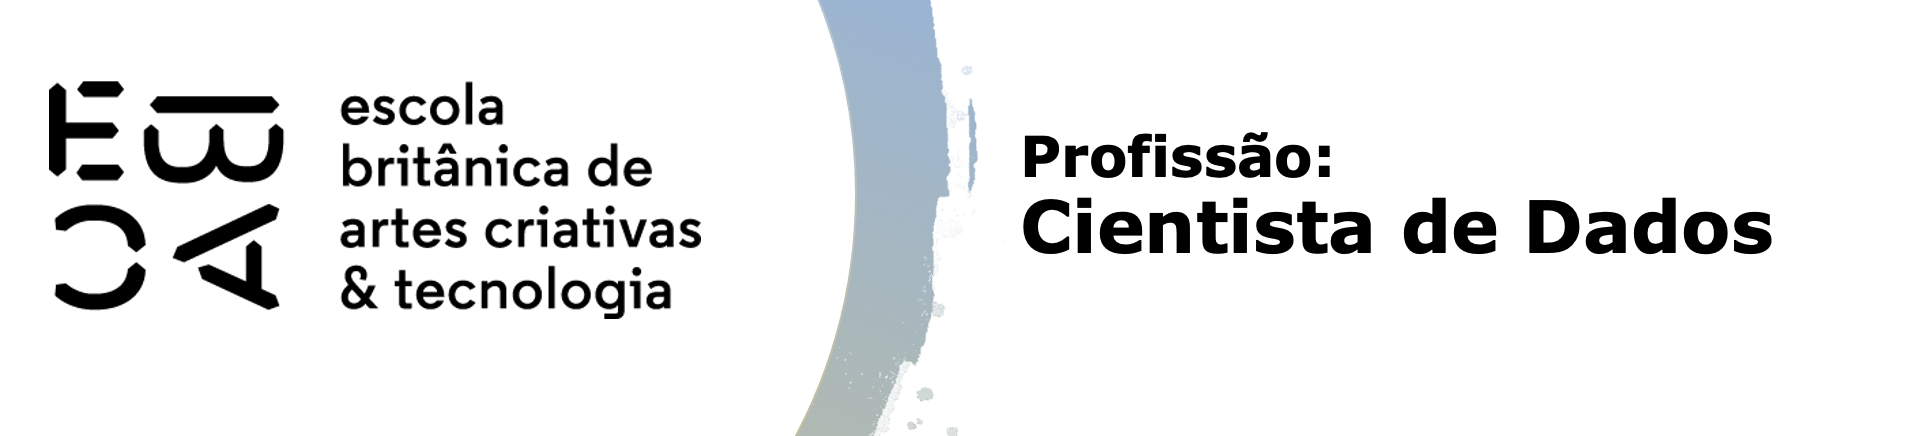

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , roc_auc_score

In [2]:
filename_features = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\features.txt"
filename_labels = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\activity_labels.txt"

filename_subtrain = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\train\subject_train.txt"
filename_xtrain = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\train\X_train.txt"
filename_ytrain = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\train\y_train.txt"

filename_subtest = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\test\subject_test.txt"
ffilename_xtest = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\test\X_test.txt"
filename_ytest = r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo17-ÁrvoresII(ParteIIárvoredeclassificação)\UCI HAR Dataset\test\y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Positivo\AppData\Local\Temp\ipykernel_8436\233342148.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Positivo\AppData\Local\Temp\ipykernel_8436\233342148.py:15: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Positivo\AppData\Local\Temp\ipykernel_8436\233342148.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


In [4]:
print(X_train.shape)
print(X_test.shape)

(7352, 561)
(2947, 561)


In [6]:
X_train.dtypes

1 tBodyAcc-mean()-X                         float64
2 tBodyAcc-mean()-Y                         float64
3 tBodyAcc-mean()-Z                         float64
4 tBodyAcc-std()-X                          float64
5 tBodyAcc-std()-Y                          float64
                                             ...   
557 angle(tBodyGyroMean,gravityMean)        float64
558 angle(tBodyGyroJerkMean,gravityMean)    float64
559 angle(X,gravityMean)                    float64
560 angle(Y,gravityMean)                    float64
561 angle(Z,gravityMean)                    float64
Length: 561, dtype: object

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [8]:
x_treino , x_validacao , y_treino ,y_validacao  = train_test_split(X_train, y_train , test_size=0.25 , random_state=1729)

In [9]:
%%time
caminho = DecisionTreeClassifier(random_state=2360873 ).cost_complexity_pruning_path(x_treino,y_treino)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

CPU times: total: 5.19 s
Wall time: 5.55 s


In [10]:
# Garantindo que os ccp são unicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

ccp_alphas

array([0.00000000e+00, 1.79788623e-04, 1.79917209e-04, 1.80825599e-04,
       1.80874216e-04, 1.81055790e-04, 1.81356547e-04, 2.41808729e-04,
       2.72034820e-04, 2.90170475e-04, 3.02260912e-04, 3.22411639e-04,
       3.36805016e-04, 3.49759055e-04, 3.53412758e-04, 3.53491575e-04,
       3.53645267e-04, 3.54828027e-04, 3.54994428e-04, 3.58748855e-04,
       3.59539369e-04, 3.60315985e-04, 3.62713094e-04, 3.62713094e-04,
       4.02749965e-04, 4.35255713e-04, 4.43212879e-04, 4.49876706e-04,
       4.53391367e-04, 4.77678406e-04, 4.83617459e-04, 5.18161563e-04,
       5.31940483e-04, 5.89408778e-04, 6.40762191e-04, 6.56769781e-04,
       6.73610032e-04, 6.77064442e-04, 6.93885919e-04, 6.98718955e-04,
       7.11487385e-04, 8.16104461e-04, 8.51826205e-04, 8.70511425e-04,
       8.84113166e-04, 9.46208071e-04, 9.60163866e-04, 9.77587420e-04,
       9.87385645e-04, 9.89217529e-04, 1.01868358e-03, 1.02084182e-03,
       1.08813928e-03, 1.12181449e-03, 1.14254625e-03, 1.20268026e-03,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [12]:
%%time

clf = DecisionTreeClassifier(random_state=2360873)

grip_paramentros = {"ccp_alpha":ccp_alphas}
grip_paramentros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 1.79788623e-04, 1.79917209e-04, 1.80825599e-04,
        1.80874216e-04, 1.81055790e-04, 1.81356547e-04, 2.41808729e-04,
        2.72034820e-04, 2.90170475e-04, 3.02260912e-04, 3.22411639e-04,
        3.36805016e-04, 3.49759055e-04, 3.53412758e-04, 3.53491575e-04,
        3.53645267e-04, 3.54828027e-04, 3.54994428e-04, 3.58748855e-04,
        3.59539369e-04, 3.60315985e-04, 3.62713094e-04, 3.62713094e-04,
        4.02749965e-04, 4.35255713e-04, 4.43212879e-04, 4.49876706e-04,
        4.53391367e-04, 4.77678406e-04, 4.83617459e-04, 5.18161563e-04,
        5.31940483e-04, 5.89408778e-04, 6.40762191e-04, 6.56769781e-04,
        6.73610032e-04, 6.77064442e-04, 6.93885919e-04, 6.98718955e-04,
        7.11487385e-04, 8.16104461e-04, 8.51826205e-04, 8.70511425e-04,
        8.84113166e-04, 9.46208071e-04, 9.60163866e-04, 9.77587420e-04,
        9.87385645e-04, 9.89217529e-04, 1.01868358e-03, 1.02084182e-03,
        1.08813928e-03, 1.12181449e-03, 1.14254625e

In [16]:
%%time
grid = GridSearchCV(estimator=clf , param_grid=grip_paramentros , cv=10 , verbose=10)

grid.fit(x_treino  , y_treino)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV 1/10; 1/96] START ccp_alpha=0.0.............................................
[CV 1/10; 1/96] END ..............ccp_alpha=0.0;, score=0.926 total time=   4.8s
[CV 2/10; 1/96] START ccp_alpha=0.0.............................................
[CV 2/10; 1/96] END ..............ccp_alpha=0.0;, score=0.953 total time=   4.3s
[CV 3/10; 1/96] START ccp_alpha=0.0.............................................
[CV 3/10; 1/96] END ..............ccp_alpha=0.0;, score=0.938 total time=   5.1s
[CV 4/10; 1/96] START ccp_alpha=0.0.............................................
[CV 4/10; 1/96] END ..............ccp_alpha=0.0;, score=0.908 total time=   4.7s
[CV 5/10; 1/96] START ccp_alpha=0.0.............................................
[CV 5/10; 1/96] END ..............ccp_alpha=0.0;, score=0.936 total time=   4.5s
[CV 6/10; 1/96] START ccp_alpha=0.0.............................................
[CV 6/10; 1/96] END ..............ccp_alpha=0.

[CV 10/10; 5/96] END ccp_alpha=0.0001808742157293999;, score=0.942 total time=   4.6s
[CV 1/10; 6/96] START ccp_alpha=0.00018105578984535715..........................
[CV 1/10; 6/96] END ccp_alpha=0.00018105578984535715;, score=0.926 total time=   4.5s
[CV 2/10; 6/96] START ccp_alpha=0.00018105578984535715..........................
[CV 2/10; 6/96] END ccp_alpha=0.00018105578984535715;, score=0.953 total time=   4.1s
[CV 3/10; 6/96] START ccp_alpha=0.00018105578984535715..........................
[CV 3/10; 6/96] END ccp_alpha=0.00018105578984535715;, score=0.938 total time=   4.6s
[CV 4/10; 6/96] START ccp_alpha=0.00018105578984535715..........................
[CV 4/10; 6/96] END ccp_alpha=0.00018105578984535715;, score=0.908 total time=   4.4s
[CV 5/10; 6/96] START ccp_alpha=0.00018105578984535715..........................
[CV 5/10; 6/96] END ccp_alpha=0.00018105578984535715;, score=0.936 total time=   4.1s
[CV 6/10; 6/96] START ccp_alpha=0.00018105578984535715.........................

[CV 10/10; 10/96] END ccp_alpha=0.000290170475154153;, score=0.946 total time=   4.6s
[CV 1/10; 11/96] START ccp_alpha=0.0003022609116189095..........................
[CV 1/10; 11/96] END ccp_alpha=0.0003022609116189095;, score=0.929 total time=   4.6s
[CV 2/10; 11/96] START ccp_alpha=0.0003022609116189095..........................
[CV 2/10; 11/96] END ccp_alpha=0.0003022609116189095;, score=0.957 total time=   4.1s
[CV 3/10; 11/96] START ccp_alpha=0.0003022609116189095..........................
[CV 3/10; 11/96] END ccp_alpha=0.0003022609116189095;, score=0.942 total time=   4.5s
[CV 4/10; 11/96] START ccp_alpha=0.0003022609116189095..........................
[CV 4/10; 11/96] END ccp_alpha=0.0003022609116189095;, score=0.908 total time=   4.4s
[CV 5/10; 11/96] START ccp_alpha=0.0003022609116189095..........................
[CV 5/10; 11/96] END ccp_alpha=0.0003022609116189095;, score=0.936 total time=   4.1s
[CV 6/10; 11/96] START ccp_alpha=0.0003022609116189095.........................

[CV 9/10; 15/96] END ccp_alpha=0.00035341275820057074;, score=0.940 total time=   4.2s
[CV 10/10; 15/96] START ccp_alpha=0.00035341275820057074........................
[CV 10/10; 15/96] END ccp_alpha=0.00035341275820057074;, score=0.944 total time=   4.6s
[CV 1/10; 16/96] START ccp_alpha=0.00035349157460516536.........................
[CV 1/10; 16/96] END ccp_alpha=0.00035349157460516536;, score=0.926 total time=   4.5s
[CV 2/10; 16/96] START ccp_alpha=0.00035349157460516536.........................
[CV 2/10; 16/96] END ccp_alpha=0.00035349157460516536;, score=0.957 total time=   4.1s
[CV 3/10; 16/96] START ccp_alpha=0.00035349157460516536.........................
[CV 3/10; 16/96] END ccp_alpha=0.00035349157460516536;, score=0.942 total time=   4.5s
[CV 4/10; 16/96] START ccp_alpha=0.00035349157460516536.........................
[CV 4/10; 16/96] END ccp_alpha=0.00035349157460516536;, score=0.909 total time=   4.4s
[CV 5/10; 16/96] START ccp_alpha=0.00035349157460516536.................

[CV 8/10; 20/96] END ccp_alpha=0.0003587488548560929;, score=0.940 total time=   4.4s
[CV 9/10; 20/96] START ccp_alpha=0.0003587488548560929..........................
[CV 9/10; 20/96] END ccp_alpha=0.0003587488548560929;, score=0.940 total time=   4.3s
[CV 10/10; 20/96] START ccp_alpha=0.0003587488548560929.........................
[CV 10/10; 20/96] END ccp_alpha=0.0003587488548560929;, score=0.944 total time=   4.6s
[CV 1/10; 21/96] START ccp_alpha=0.00035953936932228475.........................
[CV 1/10; 21/96] END ccp_alpha=0.00035953936932228475;, score=0.926 total time=   4.5s
[CV 2/10; 21/96] START ccp_alpha=0.00035953936932228475.........................
[CV 2/10; 21/96] END ccp_alpha=0.00035953936932228475;, score=0.957 total time=   4.1s
[CV 3/10; 21/96] START ccp_alpha=0.00035953936932228475.........................
[CV 3/10; 21/96] END ccp_alpha=0.00035953936932228475;, score=0.944 total time=   4.5s
[CV 4/10; 21/96] START ccp_alpha=0.00035953936932228475....................

[CV 7/10; 25/96] END ccp_alpha=0.0004027499646938983;, score=0.938 total time=   4.2s
[CV 8/10; 25/96] START ccp_alpha=0.0004027499646938983..........................
[CV 8/10; 25/96] END ccp_alpha=0.0004027499646938983;, score=0.951 total time=   4.4s
[CV 9/10; 25/96] START ccp_alpha=0.0004027499646938983..........................
[CV 9/10; 25/96] END ccp_alpha=0.0004027499646938983;, score=0.944 total time=   4.4s
[CV 10/10; 25/96] START ccp_alpha=0.0004027499646938983.........................
[CV 10/10; 25/96] END ccp_alpha=0.0004027499646938983;, score=0.944 total time=   4.6s
[CV 1/10; 26/96] START ccp_alpha=0.00043525571273122956.........................
[CV 1/10; 26/96] END ccp_alpha=0.00043525571273122956;, score=0.929 total time=   4.5s
[CV 2/10; 26/96] START ccp_alpha=0.00043525571273122956.........................
[CV 2/10; 26/96] END ccp_alpha=0.00043525571273122956;, score=0.955 total time=   4.2s
[CV 3/10; 26/96] START ccp_alpha=0.00043525571273122956.....................

[CV 6/10; 30/96] END ccp_alpha=0.00047767840638055447;, score=0.955 total time=   4.3s
[CV 7/10; 30/96] START ccp_alpha=0.00047767840638055447.........................
[CV 7/10; 30/96] END ccp_alpha=0.00047767840638055447;, score=0.938 total time=   4.1s
[CV 8/10; 30/96] START ccp_alpha=0.00047767840638055447.........................
[CV 8/10; 30/96] END ccp_alpha=0.00047767840638055447;, score=0.951 total time=   4.4s
[CV 9/10; 30/96] START ccp_alpha=0.00047767840638055447.........................
[CV 9/10; 30/96] END ccp_alpha=0.00047767840638055447;, score=0.944 total time=   4.3s
[CV 10/10; 30/96] START ccp_alpha=0.00047767840638055447........................
[CV 10/10; 30/96] END ccp_alpha=0.00047767840638055447;, score=0.944 total time=   4.7s
[CV 1/10; 31/96] START ccp_alpha=0.00048361745859025506.........................
[CV 1/10; 31/96] END ccp_alpha=0.00048361745859025506;, score=0.929 total time=   4.5s
[CV 2/10; 31/96] START ccp_alpha=0.00048361745859025506.................

[CV 5/10; 35/96] END ccp_alpha=0.0006407621911605527;, score=0.933 total time=   4.1s
[CV 6/10; 35/96] START ccp_alpha=0.0006407621911605527..........................
[CV 6/10; 35/96] END ccp_alpha=0.0006407621911605527;, score=0.966 total time=   4.3s
[CV 7/10; 35/96] START ccp_alpha=0.0006407621911605527..........................
[CV 7/10; 35/96] END ccp_alpha=0.0006407621911605527;, score=0.944 total time=   4.1s
[CV 8/10; 35/96] START ccp_alpha=0.0006407621911605527..........................
[CV 8/10; 35/96] END ccp_alpha=0.0006407621911605527;, score=0.953 total time=   4.4s
[CV 9/10; 35/96] START ccp_alpha=0.0006407621911605527..........................
[CV 9/10; 35/96] END ccp_alpha=0.0006407621911605527;, score=0.944 total time=   4.2s
[CV 10/10; 35/96] START ccp_alpha=0.0006407621911605527.........................
[CV 10/10; 35/96] END ccp_alpha=0.0006407621911605527;, score=0.949 total time=   4.6s
[CV 1/10; 36/96] START ccp_alpha=0.0006567697808176594........................

[CV 5/10; 40/96] END ccp_alpha=0.0006987189550975649;, score=0.935 total time=   4.1s
[CV 6/10; 40/96] START ccp_alpha=0.0006987189550975649..........................
[CV 6/10; 40/96] END ccp_alpha=0.0006987189550975649;, score=0.966 total time=   4.4s
[CV 7/10; 40/96] START ccp_alpha=0.0006987189550975649..........................
[CV 7/10; 40/96] END ccp_alpha=0.0006987189550975649;, score=0.944 total time=   4.2s
[CV 8/10; 40/96] START ccp_alpha=0.0006987189550975649..........................
[CV 8/10; 40/96] END ccp_alpha=0.0006987189550975649;, score=0.951 total time=   4.4s
[CV 9/10; 40/96] START ccp_alpha=0.0006987189550975649..........................
[CV 9/10; 40/96] END ccp_alpha=0.0006987189550975649;, score=0.942 total time=   4.2s
[CV 10/10; 40/96] START ccp_alpha=0.0006987189550975649.........................
[CV 10/10; 40/96] END ccp_alpha=0.0006987189550975649;, score=0.946 total time=   4.6s
[CV 1/10; 41/96] START ccp_alpha=0.0007114873845738124........................

[CV 5/10; 45/96] END ccp_alpha=0.0008841131664853101;, score=0.938 total time=   4.1s
[CV 6/10; 45/96] START ccp_alpha=0.0008841131664853101..........................
[CV 6/10; 45/96] END ccp_alpha=0.0008841131664853101;, score=0.960 total time=   4.3s
[CV 7/10; 45/96] START ccp_alpha=0.0008841131664853101..........................
[CV 7/10; 45/96] END ccp_alpha=0.0008841131664853101;, score=0.951 total time=   4.1s
[CV 8/10; 45/96] START ccp_alpha=0.0008841131664853101..........................
[CV 8/10; 45/96] END ccp_alpha=0.0008841131664853101;, score=0.944 total time=   4.4s
[CV 9/10; 45/96] START ccp_alpha=0.0008841131664853101..........................
[CV 9/10; 45/96] END ccp_alpha=0.0008841131664853101;, score=0.940 total time=   4.2s
[CV 10/10; 45/96] START ccp_alpha=0.0008841131664853101.........................
[CV 10/10; 45/96] END ccp_alpha=0.0008841131664853101;, score=0.947 total time=   4.6s
[CV 1/10; 46/96] START ccp_alpha=0.0009462080711548467........................

[CV 5/10; 50/96] END ccp_alpha=0.0009892175289346128;, score=0.938 total time=   4.1s
[CV 6/10; 50/96] START ccp_alpha=0.0009892175289346128..........................
[CV 6/10; 50/96] END ccp_alpha=0.0009892175289346128;, score=0.956 total time=   4.3s
[CV 7/10; 50/96] START ccp_alpha=0.0009892175289346128..........................
[CV 7/10; 50/96] END ccp_alpha=0.0009892175289346128;, score=0.955 total time=   4.2s
[CV 8/10; 50/96] START ccp_alpha=0.0009892175289346128..........................
[CV 8/10; 50/96] END ccp_alpha=0.0009892175289346128;, score=0.944 total time=   4.4s
[CV 9/10; 50/96] START ccp_alpha=0.0009892175289346128..........................
[CV 9/10; 50/96] END ccp_alpha=0.0009892175289346128;, score=0.936 total time=   4.3s
[CV 10/10; 50/96] START ccp_alpha=0.0009892175289346128.........................
[CV 10/10; 50/96] END ccp_alpha=0.0009892175289346128;, score=0.949 total time=   4.6s
[CV 1/10; 51/96] START ccp_alpha=0.0010186835829879839........................

[CV 5/10; 55/96] END ccp_alpha=0.0011425462459194779;, score=0.940 total time=   4.1s
[CV 6/10; 55/96] START ccp_alpha=0.0011425462459194779..........................
[CV 6/10; 55/96] END ccp_alpha=0.0011425462459194779;, score=0.953 total time=   4.4s
[CV 7/10; 55/96] START ccp_alpha=0.0011425462459194779..........................
[CV 7/10; 55/96] END ccp_alpha=0.0011425462459194779;, score=0.955 total time=   4.1s
[CV 8/10; 55/96] START ccp_alpha=0.0011425462459194779..........................
[CV 8/10; 55/96] END ccp_alpha=0.0011425462459194779;, score=0.942 total time=   4.6s
[CV 9/10; 55/96] START ccp_alpha=0.0011425462459194779..........................
[CV 9/10; 55/96] END ccp_alpha=0.0011425462459194779;, score=0.942 total time=   4.4s
[CV 10/10; 55/96] START ccp_alpha=0.0011425462459194779.........................
[CV 10/10; 55/96] END ccp_alpha=0.0011425462459194779;, score=0.949 total time=   4.6s
[CV 1/10; 56/96] START ccp_alpha=0.0012026802588626082........................

[CV 5/10; 60/96] END ccp_alpha=0.001309797283681941;, score=0.942 total time=   4.1s
[CV 6/10; 60/96] START ccp_alpha=0.001309797283681941...........................
[CV 6/10; 60/96] END ccp_alpha=0.001309797283681941;, score=0.958 total time=   4.3s
[CV 7/10; 60/96] START ccp_alpha=0.001309797283681941...........................
[CV 7/10; 60/96] END ccp_alpha=0.001309797283681941;, score=0.951 total time=   4.1s
[CV 8/10; 60/96] START ccp_alpha=0.001309797283681941...........................
[CV 8/10; 60/96] END ccp_alpha=0.001309797283681941;, score=0.944 total time=   4.4s
[CV 9/10; 60/96] START ccp_alpha=0.001309797283681941...........................
[CV 9/10; 60/96] END ccp_alpha=0.001309797283681941;, score=0.942 total time=   4.2s
[CV 10/10; 60/96] START ccp_alpha=0.001309797283681941..........................
[CV 10/10; 60/96] END ccp_alpha=0.001309797283681941;, score=0.944 total time=   4.7s
[CV 1/10; 61/96] START ccp_alpha=0.0013502819269957463..........................
[CV

[CV 5/10; 65/96] END ccp_alpha=0.0015889296818659693;, score=0.946 total time=   4.1s
[CV 6/10; 65/96] START ccp_alpha=0.0015889296818659693..........................
[CV 6/10; 65/96] END ccp_alpha=0.0015889296818659693;, score=0.956 total time=   4.4s
[CV 7/10; 65/96] START ccp_alpha=0.0015889296818659693..........................
[CV 7/10; 65/96] END ccp_alpha=0.0015889296818659693;, score=0.947 total time=   4.1s
[CV 8/10; 65/96] START ccp_alpha=0.0015889296818659693..........................
[CV 8/10; 65/96] END ccp_alpha=0.0015889296818659693;, score=0.936 total time=   4.4s
[CV 9/10; 65/96] START ccp_alpha=0.0015889296818659693..........................
[CV 9/10; 65/96] END ccp_alpha=0.0015889296818659693;, score=0.944 total time=   4.2s
[CV 10/10; 65/96] START ccp_alpha=0.0015889296818659693.........................
[CV 10/10; 65/96] END ccp_alpha=0.0015889296818659693;, score=0.940 total time=   4.6s
[CV 1/10; 66/96] START ccp_alpha=0.0015922023154601095........................

[CV 5/10; 70/96] END ccp_alpha=0.0016507475919880707;, score=0.946 total time=   4.1s
[CV 6/10; 70/96] START ccp_alpha=0.0016507475919880707..........................
[CV 6/10; 70/96] END ccp_alpha=0.0016507475919880707;, score=0.956 total time=   4.3s
[CV 7/10; 70/96] START ccp_alpha=0.0016507475919880707..........................
[CV 7/10; 70/96] END ccp_alpha=0.0016507475919880707;, score=0.944 total time=   4.1s
[CV 8/10; 70/96] START ccp_alpha=0.0016507475919880707..........................
[CV 8/10; 70/96] END ccp_alpha=0.0016507475919880707;, score=0.936 total time=   4.4s
[CV 9/10; 70/96] START ccp_alpha=0.0016507475919880707..........................
[CV 9/10; 70/96] END ccp_alpha=0.0016507475919880707;, score=0.944 total time=   4.2s
[CV 10/10; 70/96] START ccp_alpha=0.0016507475919880707.........................
[CV 10/10; 70/96] END ccp_alpha=0.0016507475919880707;, score=0.940 total time=   4.6s
[CV 1/10; 71/96] START ccp_alpha=0.0019647841996740193........................

[CV 5/10; 75/96] END ccp_alpha=0.0021052362932732576;, score=0.947 total time=   4.1s
[CV 6/10; 75/96] START ccp_alpha=0.0021052362932732576..........................
[CV 6/10; 75/96] END ccp_alpha=0.0021052362932732576;, score=0.949 total time=   4.3s
[CV 7/10; 75/96] START ccp_alpha=0.0021052362932732576..........................
[CV 7/10; 75/96] END ccp_alpha=0.0021052362932732576;, score=0.942 total time=   4.1s
[CV 8/10; 75/96] START ccp_alpha=0.0021052362932732576..........................
[CV 8/10; 75/96] END ccp_alpha=0.0021052362932732576;, score=0.927 total time=   4.5s
[CV 9/10; 75/96] START ccp_alpha=0.0021052362932732576..........................
[CV 9/10; 75/96] END ccp_alpha=0.0021052362932732576;, score=0.946 total time=   4.3s
[CV 10/10; 75/96] START ccp_alpha=0.0021052362932732576.........................
[CV 10/10; 75/96] END ccp_alpha=0.0021052362932732576;, score=0.936 total time=   5.2s
[CV 1/10; 76/96] START ccp_alpha=0.0021798611889175604........................

[CV 5/10; 80/96] END ccp_alpha=0.0027622927301450967;, score=0.942 total time=   4.4s
[CV 6/10; 80/96] START ccp_alpha=0.0027622927301450967..........................
[CV 6/10; 80/96] END ccp_alpha=0.0027622927301450967;, score=0.929 total time=   4.4s
[CV 7/10; 80/96] START ccp_alpha=0.0027622927301450967..........................
[CV 7/10; 80/96] END ccp_alpha=0.0027622927301450967;, score=0.944 total time=   4.2s
[CV 8/10; 80/96] START ccp_alpha=0.0027622927301450967..........................
[CV 8/10; 80/96] END ccp_alpha=0.0027622927301450967;, score=0.913 total time=   4.4s
[CV 9/10; 80/96] START ccp_alpha=0.0027622927301450967..........................
[CV 9/10; 80/96] END ccp_alpha=0.0027622927301450967;, score=0.940 total time=   4.2s
[CV 10/10; 80/96] START ccp_alpha=0.0027622927301450967.........................
[CV 10/10; 80/96] END ccp_alpha=0.0027622927301450967;, score=0.931 total time=   4.6s
[CV 1/10; 81/96] START ccp_alpha=0.0030195256872211137........................

[CV 5/10; 85/96] END ccp_alpha=0.005838492132025825;, score=0.924 total time=   4.1s
[CV 6/10; 85/96] START ccp_alpha=0.005838492132025825...........................
[CV 6/10; 85/96] END ccp_alpha=0.005838492132025825;, score=0.920 total time=   4.3s
[CV 7/10; 85/96] START ccp_alpha=0.005838492132025825...........................
[CV 7/10; 85/96] END ccp_alpha=0.005838492132025825;, score=0.931 total time=   4.1s
[CV 8/10; 85/96] START ccp_alpha=0.005838492132025825...........................
[CV 8/10; 85/96] END ccp_alpha=0.005838492132025825;, score=0.906 total time=   4.4s
[CV 9/10; 85/96] START ccp_alpha=0.005838492132025825...........................
[CV 9/10; 85/96] END ccp_alpha=0.005838492132025825;, score=0.918 total time=   4.4s
[CV 10/10; 85/96] START ccp_alpha=0.005838492132025825..........................
[CV 10/10; 85/96] END ccp_alpha=0.005838492132025825;, score=0.924 total time=   4.6s
[CV 1/10; 86/96] START ccp_alpha=0.0064671018522073735..........................
[CV

[CV 5/10; 90/96] END ccp_alpha=0.011803860224375975;, score=0.900 total time=   4.1s
[CV 6/10; 90/96] START ccp_alpha=0.011803860224375975...........................
[CV 6/10; 90/96] END ccp_alpha=0.011803860224375975;, score=0.902 total time=   4.4s
[CV 7/10; 90/96] START ccp_alpha=0.011803860224375975...........................
[CV 7/10; 90/96] END ccp_alpha=0.011803860224375975;, score=0.917 total time=   4.1s
[CV 8/10; 90/96] START ccp_alpha=0.011803860224375975...........................
[CV 8/10; 90/96] END ccp_alpha=0.011803860224375975;, score=0.893 total time=   4.5s
[CV 9/10; 90/96] START ccp_alpha=0.011803860224375975...........................
[CV 9/10; 90/96] END ccp_alpha=0.011803860224375975;, score=0.906 total time=   4.2s
[CV 10/10; 90/96] START ccp_alpha=0.011803860224375975..........................
[CV 10/10; 90/96] END ccp_alpha=0.011803860224375975;, score=0.895 total time=   4.6s
[CV 1/10; 91/96] START ccp_alpha=0.01932648917919043............................
[CV

[CV 5/10; 95/96] END ccp_alpha=0.16755691391216432;, score=0.377 total time=   4.1s
[CV 6/10; 95/96] START ccp_alpha=0.16755691391216432............................
[CV 6/10; 95/96] END ccp_alpha=0.16755691391216432;, score=0.376 total time=   4.3s
[CV 7/10; 95/96] START ccp_alpha=0.16755691391216432............................
[CV 7/10; 95/96] END ccp_alpha=0.16755691391216432;, score=0.544 total time=   4.2s
[CV 8/10; 95/96] START ccp_alpha=0.16755691391216432............................
[CV 8/10; 95/96] END ccp_alpha=0.16755691391216432;, score=0.544 total time=   4.4s
[CV 9/10; 95/96] START ccp_alpha=0.16755691391216432............................
[CV 9/10; 95/96] END ccp_alpha=0.16755691391216432;, score=0.544 total time=   4.2s
[CV 10/10; 95/96] START ccp_alpha=0.16755691391216432...........................
[CV 10/10; 95/96] END ccp_alpha=0.16755691391216432;, score=0.543 total time=   4.6s
[CV 1/10; 96/96] START ccp_alpha=0.1853135001888231.............................
[CV 1/10;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.79788623e-04, 1.79917209e-04, 1.80825599e-04,
       1.80874216e-04, 1.81055790e-04, 1.81356547e-04, 2.41808729e-04,
       2.72034820e-04, 2.90170475e-04, 3.02260912e-04, 3.22411639e-04,
       3.36805016e-04, 3.49759055e-04, 3.53412758e-04, 3.53491575e-04,
       3.536...
       2.04026115e-03, 2.05011749e-03, 2.10523629e-03, 2.17986119e-03,
       2.19587859e-03, 2.28073743e-03, 2.46551381e-03, 2.76229273e-03,
       3.01952569e-03, 3.79851818e-03, 3.91184418e-03, 5.14025004e-03,
       5.83849213e-03, 6.46710185e-03, 7.51448216e-03, 1.03919704e-02,
       1.14567352e-02, 1.18038602e-02, 1.93264892e-02, 8.23760422e-02,
       8.88467124e-02, 1.13830403e-01, 1.67556914e-01, 1.85313500e-01])},
             verbose=10)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [17]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.79788623e-04, 1.79917209e-04, 1.80825599e-04,
       1.80874216e-04, 1.81055790e-04, 1.81356547e-04, 2.41808729e-04,
       2.72034820e-04, 2.90170475e-04, 3.02260912e-04, 3.22411639e-04,
       3.36805016e-04, 3.49759055e-04, 3.53412758e-04, 3.53491575e-04,
       3.536...
       2.04026115e-03, 2.05011749e-03, 2.10523629e-03, 2.17986119e-03,
       2.19587859e-03, 2.28073743e-03, 2.46551381e-03, 2.76229273e-03,
       3.01952569e-03, 3.79851818e-03, 3.91184418e-03, 5.14025004e-03,
       5.83849213e-03, 6.46710185e-03, 7.51448216e-03, 1.03919704e-02,
       1.14567352e-02, 1.18038602e-02, 1.93264892e-02, 8.23760422e-02,
       8.88467124e-02, 1.13830403e-01, 1.67556914e-01, 1.85313500e-01])},
             verbose=10)

In [18]:
resultados = pd.DataFrame(grid.cv_results_)

resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,4.692978,0.219398,0.009697,0.000457,0.0,{'ccp_alpha': 0.0},0.925725,0.952899,0.938406,0.907609,0.936479,0.950998,0.940109,0.932849,0.934664,0.941924,0.936166,0.012213,69
1,4.581774,0.230831,0.010097,0.001135,0.00018,{'ccp_alpha': 0.00017978862293412925},0.925725,0.952899,0.938406,0.907609,0.936479,0.950998,0.940109,0.932849,0.934664,0.941924,0.936166,0.012213,69
2,4.521876,0.185421,0.009997,0.001095,0.00018,{'ccp_alpha': 0.00017991720929696933},0.925725,0.952899,0.938406,0.907609,0.936479,0.950998,0.940109,0.932849,0.934664,0.941924,0.936166,0.012213,69
3,4.471192,0.199919,0.009797,0.000399,0.000181,{'ccp_alpha': 0.00018082559932232844},0.925725,0.952899,0.938406,0.907609,0.936479,0.950998,0.940109,0.932849,0.934664,0.941924,0.936166,0.012213,69
4,4.474882,0.178293,0.010096,0.000300,0.000181,{'ccp_alpha': 0.0001808742157293999},0.925725,0.952899,0.938406,0.907609,0.936479,0.950998,0.940109,0.932849,0.934664,0.941924,0.936166,0.012213,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,4.424735,0.190579,0.009498,0.000498,0.082376,{'ccp_alpha': 0.08237604217194656},0.760870,0.878623,0.771739,0.766304,0.787659,0.892922,0.809437,0.785844,0.794918,0.885662,0.813398,0.049287,92
92,4.439995,0.172909,0.009797,0.000400,0.088847,{'ccp_alpha': 0.0888467124418375},0.760870,0.675725,0.666667,0.766304,0.787659,0.787659,0.695100,0.785844,0.684211,0.689655,0.729969,0.048926,93
93,4.427764,0.187443,0.009796,0.000399,0.11383,{'ccp_alpha': 0.11383040334024022},0.659420,0.675725,0.666667,0.672101,0.544465,0.540835,0.544465,0.676951,0.544465,0.542650,0.606774,0.063571,94
94,4.426371,0.179966,0.009797,0.000400,0.167557,{'ccp_alpha': 0.16755691391216432},0.541667,0.539855,0.376812,0.376812,0.377495,0.375681,0.544465,0.544465,0.544465,0.542650,0.476436,0.081447,95


In [23]:
resultados["rank_test_score"].sort_values().head()

34    1
36    2
37    2
35    4
41    5
Name: rank_test_score, dtype: int32

In [19]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0006407621911605527, random_state=2360873)

In [20]:
grid.best_score_

0.9437840290381125

In [21]:
grid.best_index_

34

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [50]:
## Pegar a melhor variavel para o modelo
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=melhor_ccp).fit(x_treino , y_treino)

print(f" Acuracia de teste é {clf.score(X_test , y_test):.3f}")

print(f" Acuracia de treino é {clf.score(X_train , y_train):.3f}")

print(f" Acuracia de validacao é {clf.score(x_validacao , y_validacao):.3f}")

 Acuracia de teste é 0.861
 Acuracia de treino é 0.974
 Acuracia de validacao é 0.943


In [46]:
grid.best_index_

34

In [44]:
## Pegar a melhor variavel para o modelo
melhor_ccp = resultados.iloc[grid.best_index_,3]

clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=melhor_ccp).fit(x_treino , y_treino)

print(f" Acuracia de teste é {clf.score(X_test , y_test):.3f}")

print(f" Acuracia de treino é {clf.score(X_train , y_train):.3f}")

print(f" Acuracia de validacao é {clf.score(x_validacao , y_validacao):.3f}")

 Acuracia de teste é 0.860
 Acuracia de treino é 0.977
 Acuracia de validacao é 0.939


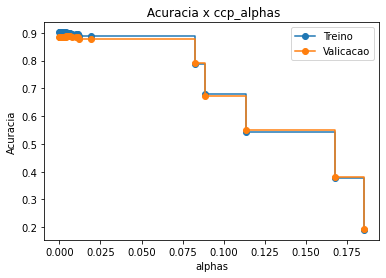

CPU times: total: 2min 36s
Wall time: 2min 48s


In [51]:
%%time
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873 , ccp_alpha=ccp_alpha ,max_depth=4).fit(x_treino , y_treino)
    clfs.append(clf)


trains_scores = [clf.score(x_treino , y_treino) for clf in clfs]
valida_scores = [clf.score(x_validacao , y_validacao) for clf in clfs]

fig , ax = plt.subplots()
ax.set_xlabel("alphas")
ax.set_ylabel("Acuracia")
ax.set_title(" Acuracia x ccp_alphas")
ax.plot(ccp_alphas , trains_scores , marker="o" , label="Treino" , drawstyle = 'steps-post')
ax.plot(ccp_alphas , valida_scores, marker="o" , label="Valicacao"  , drawstyle = 'steps-post')
ax.legend()

plt.show()

In [52]:
# utilize mean_samples_leaf=20
# utilize max_depth=4
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873 , min_samples_leaf=20, max_depth=4,ccp_alpha=melhor_ccp).fit(x_treino , y_treino)

print(f" Acuracia de teste é {clf.score(X_test , y_test):.3f}")

print(f" Acuracia de treino é {clf.score(X_train , y_train):.3f}")

print(f" Acuracia de Validacao é {clf.score(x_validacao , y_validacao):.3f}")

 Acuracia de teste é 0.809
 Acuracia de treino é 0.898
 Acuracia de Validacao é 0.886


In [55]:
%%time
melhor_indice_arvore = len(valida_scores) - valida_scores[:: -1].index(max(valida_scores))
melhor_arvore = clfs[melhor_indice_arvore]

CPU times: total: 0 ns
Wall time: 0 ns


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


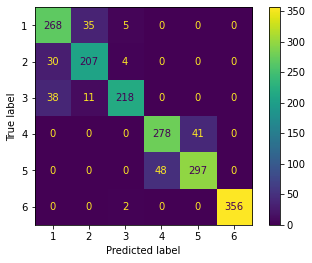

In [56]:
plot_confusion_matrix(melhor_arvore,x_validacao , y_validacao)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


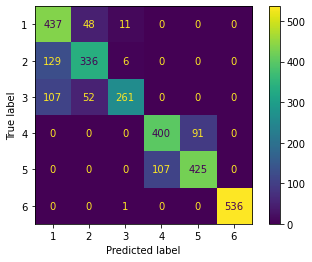

In [57]:
plot_confusion_matrix(melhor_arvore, X_test , y_test)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


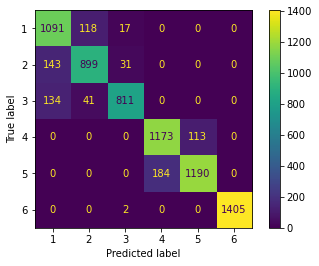

In [58]:
plot_confusion_matrix(melhor_arvore, X_train , y_train)
plt.show()